Task 4: AI Turbine Performance Score Generator
Intelligent scoring system with automated suggestions

AI TURBINE PERFORMANCE SCORE GENERATOR
Dataset loaded: (37803, 5)
Date range: 2018-01-01 00:00:00 to 2018-12-31 23:50:00

CALCULATING PERFORMANCE COMPONENTS
Performance components calculated:
  1. Power Ratio: 89.46% (Weight: 60%)
  2. Wind Utilization: 21.57% (Weight: 20%)
  3. Consistency Score: 78.77% (Weight: 20%)

CALCULATING WEIGHTED PERFORMANCE SCORE

Performance Score Statistics:
  Mean: 73.74
  Median: 74.52
  Std Dev: 6.96
  Min: 20.08
  Max: 87.62

CATEGORIZING TURBINE STATE

Turbine State Distribution:
  Moderate: 28,625 (75.72%)
  Poor: 9,136 (24.17%)
  Good: 42 (0.11%)

GENERATING AUTOMATED SUGGESTIONS
Generating suggestions for all data points...

Sample Automated Suggestions:
--------------------------------------------------------------------------------

Poor Performance (Score: nan):
  ✅ Turbine operating optimally | → Continue regular maintenance schedule

Moderate Performance (Score: 76.71):
  ℹ️ Performance acceptable but below optimal | → Recommendation: Schedule

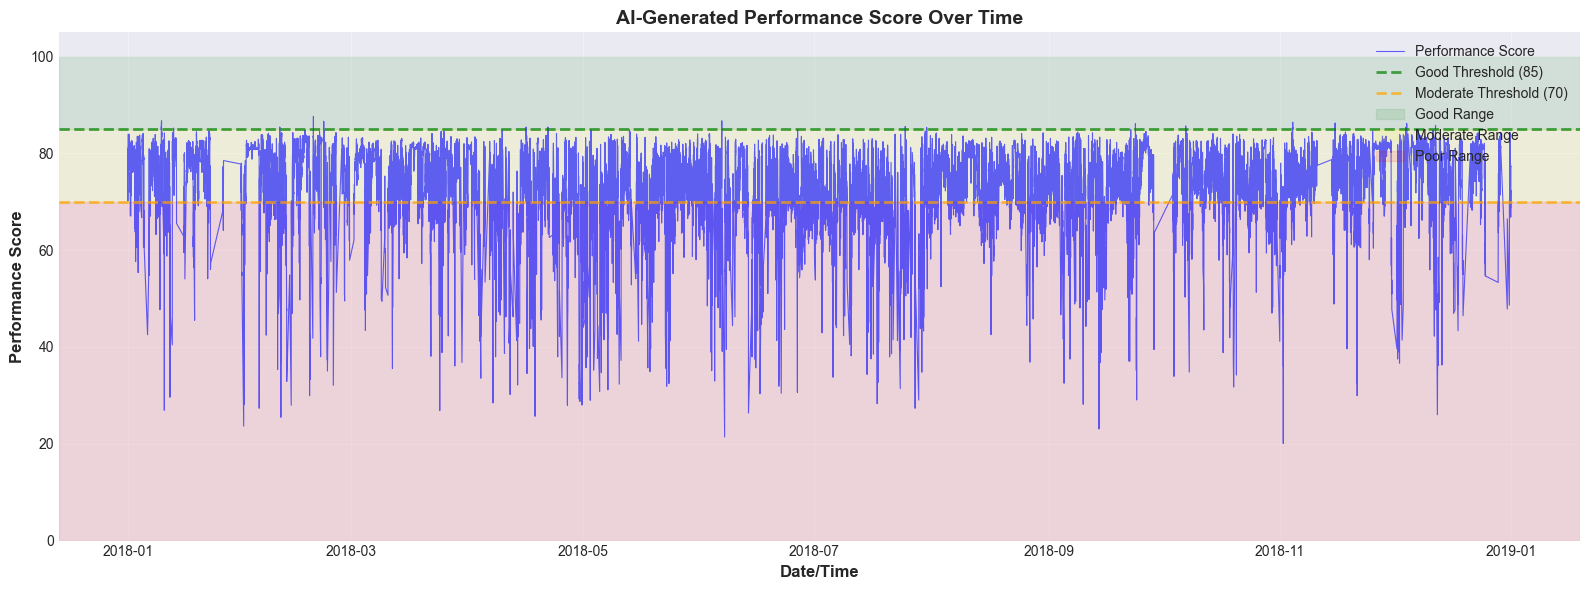

✓ Saved: task4_state_distribution.png


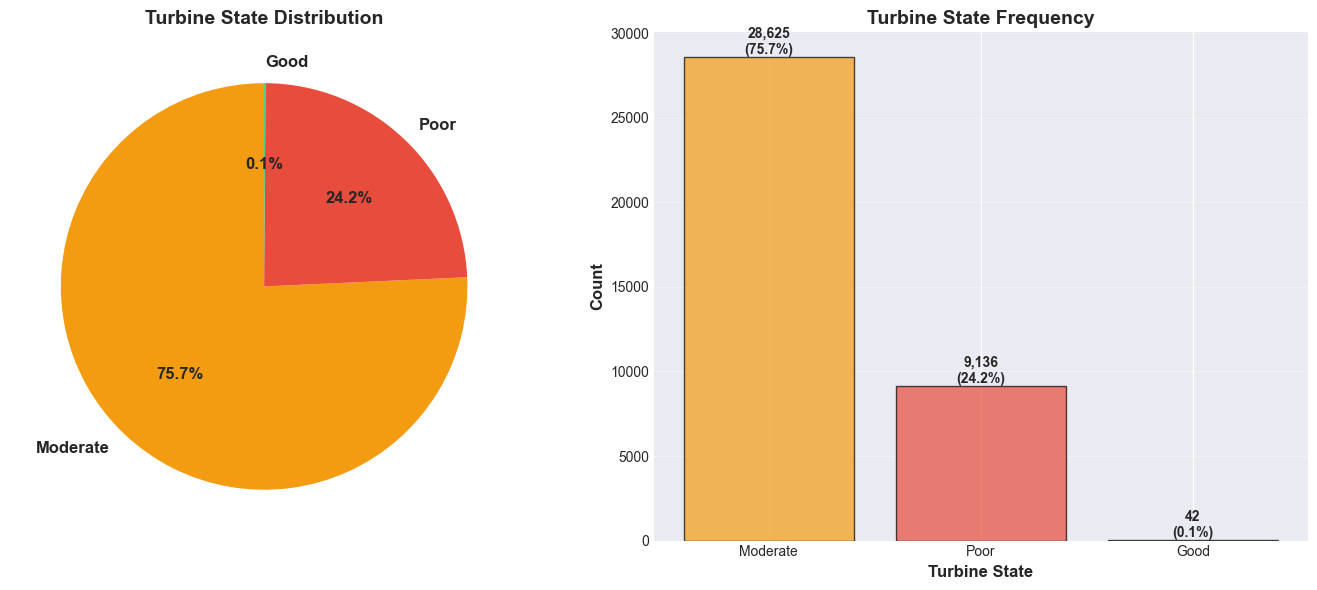

✓ Saved: task4_components_breakdown.png


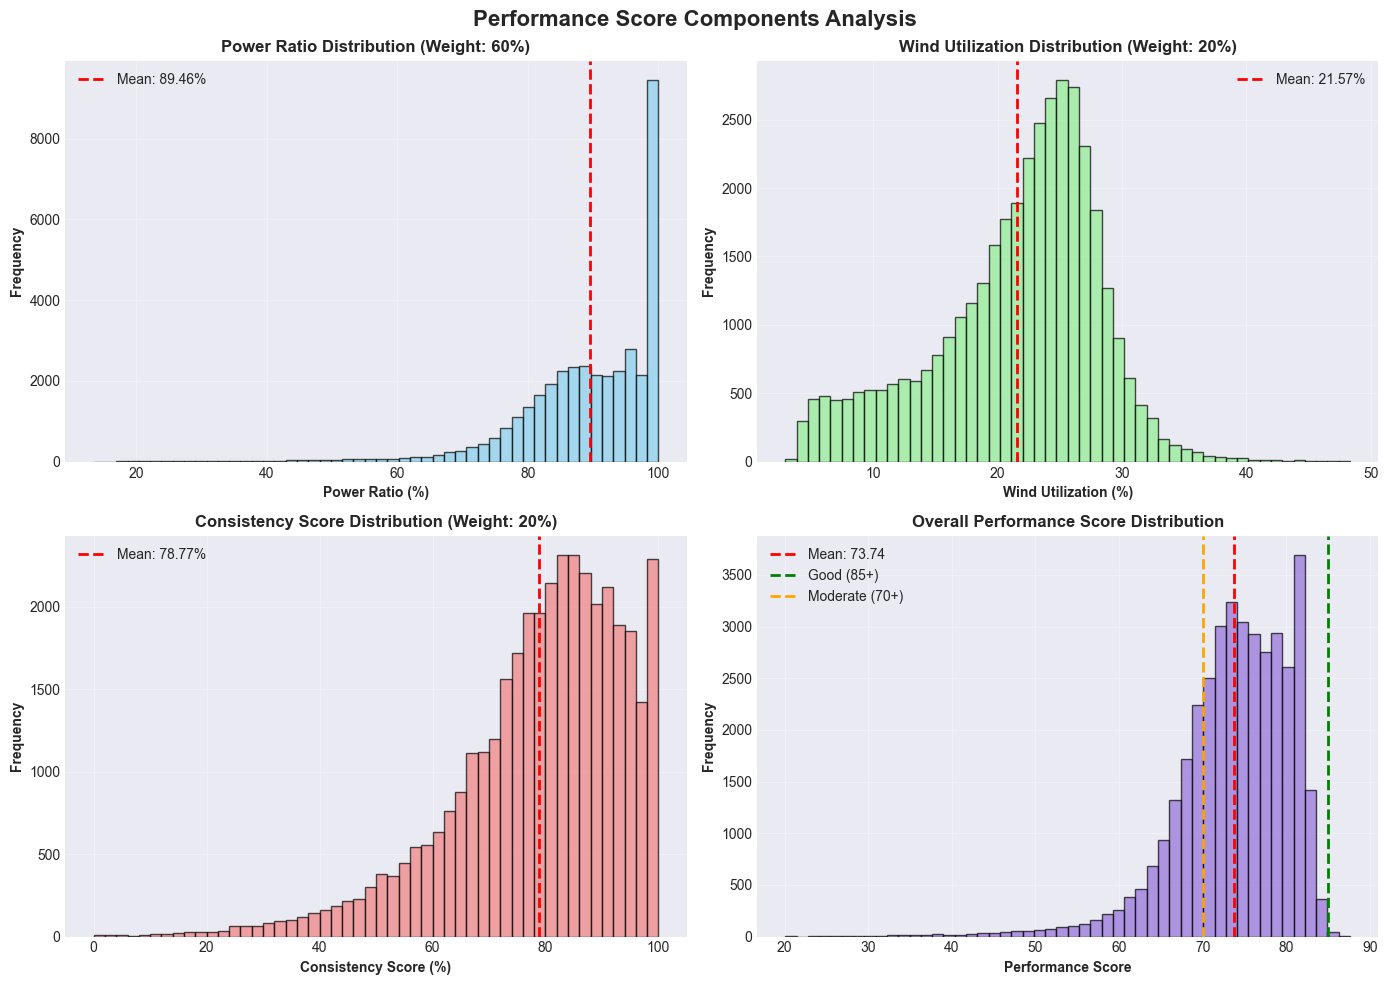

✓ Saved: task4_daily_trend.png


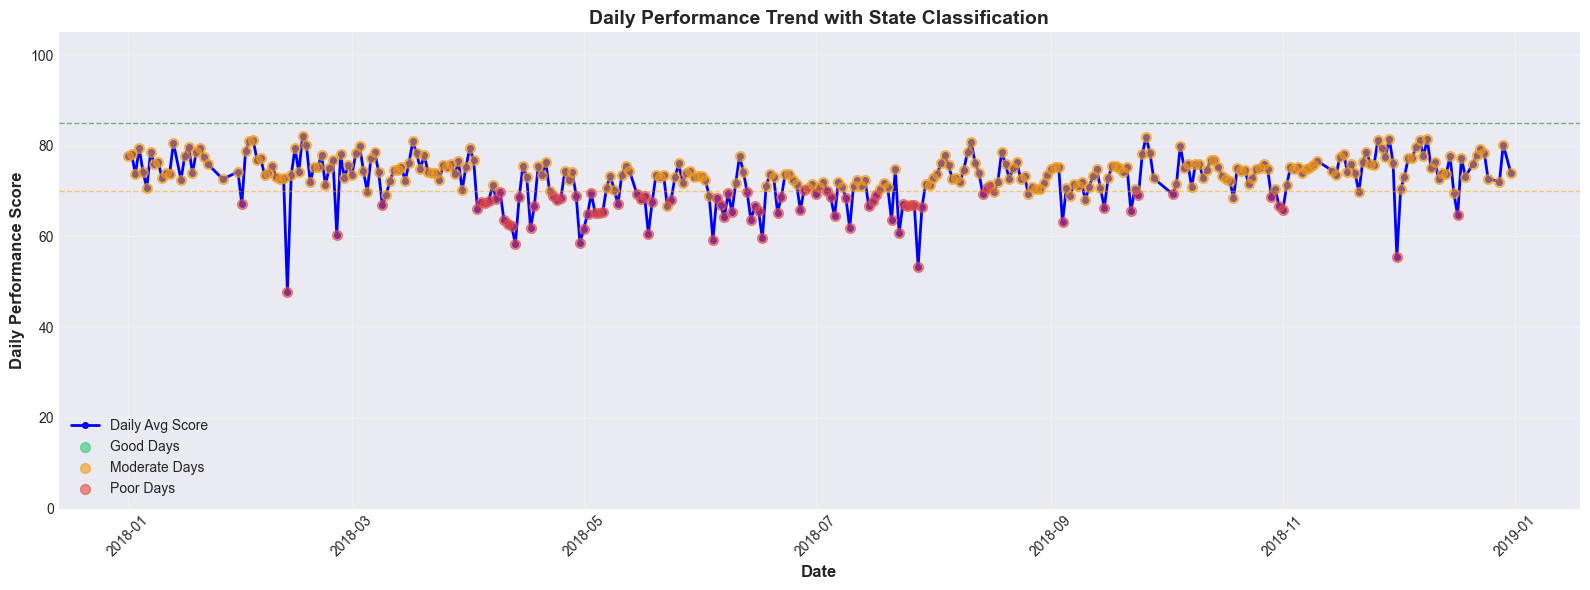

✓ Saved: task4_correlation_analysis.png


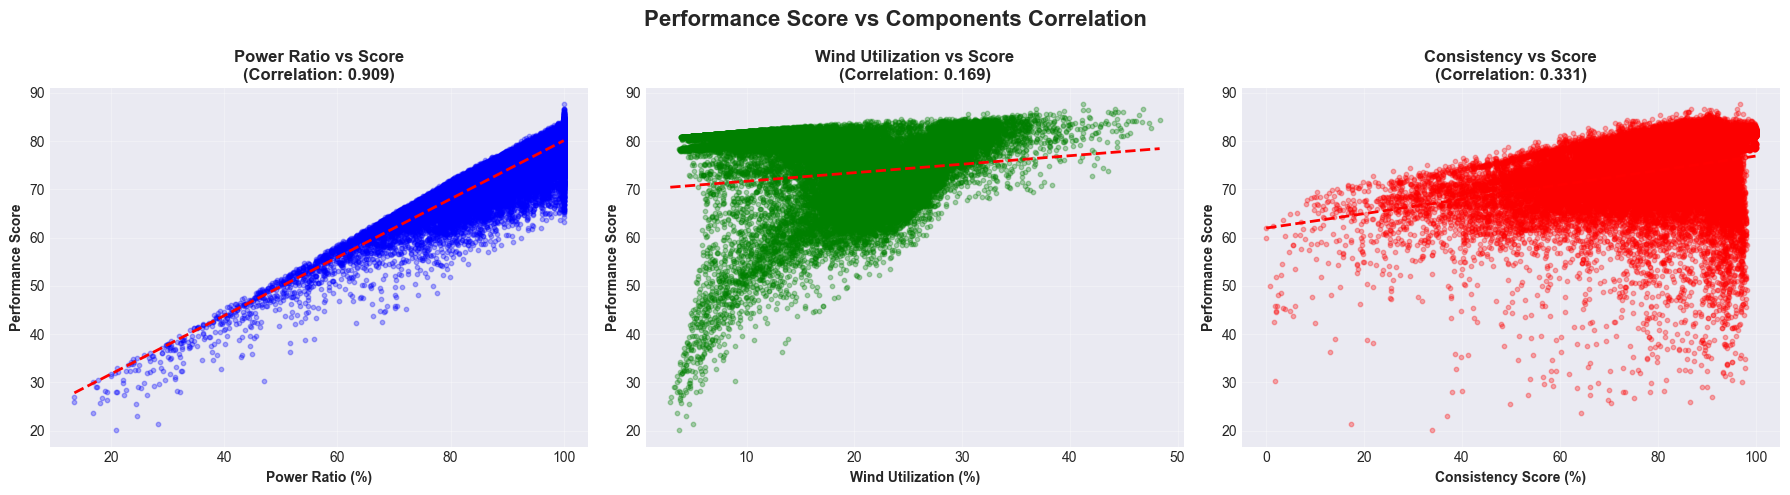


EXPORTING RESULTS
✓ Saved: task4_performance_scores.csv (37803 records)
✓ Saved: task4_daily_summary.csv (346 days)
✓ Saved: task4_state_statistics.csv

TASK 4 - AI PERFORMANCE SCORE GENERATOR SUMMARY

Scoring Methodology:
  • Multi-Component Weighted Scoring System
  • Components:
    1. Power Performance Ratio (60%)
    2. Wind Utilization Efficiency (20%)
    3. Consistency Score (20%)
  • Score Range: 0-100

Performance Categories:
  • Good (85-100): Optimal operation, continue monitoring
  • Moderate (70-84): Acceptable, schedule routine maintenance
  • Poor (<70): Critical, immediate action required

Results Summary:
  • Total Data Points: 37,803
  • Average Performance Score: 73.74
  • Median Performance Score: 74.52

State Distribution:
  • Good: 42 (0.11%)
  • Moderate: 28,625 (75.72%)
  • Poor: 9,136 (24.17%)

Component Averages:
  • Power Ratio: 89.46%
  • Wind Utilization: 21.57%
  • Consistency Score: 78.77%


Key Insights:
  1. Turbine achieves "Good" performance 0.1% of

In [1]:
"""
Wind Turbine SCADA Performance Analysis
Task 4: AI Turbine Performance Score Generator
Intelligent scoring system with automated suggestions
"""

# ============================================================================
# IMPORTS
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# 1. LOAD DATA
# ============================================================================
print("="*80)
print("AI TURBINE PERFORMANCE SCORE GENERATOR")
print("="*80)

df = pd.read_csv("D:\\10 sem\\novintix\\Wind Turbine\\dataset\\T1_cleaned.csv")
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m-%d %H:%M:%S')
df = df.sort_values('Date/Time').reset_index(drop=True)

print(f"Dataset loaded: {df.shape}")
print(f"Date range: {df['Date/Time'].min()} to {df['Date/Time'].max()}")

# ============================================================================
# 2. CALCULATE PERFORMANCE COMPONENTS
# ============================================================================
print("\n" + "="*80)
print("CALCULATING PERFORMANCE COMPONENTS")
print("="*80)

# Component 1: Power Performance Ratio (60% weight)
df['Power_Ratio'] = np.clip(
    (df['LV ActivePower (kW)'] / (df['Theoretical_Power_Curve (KWh)'] + 1e-6)) * 100,
    0, 100
)

# Component 2: Wind Utilization Efficiency (20% weight)
# Measures how well the turbine utilizes available wind
# Based on power law: Power ∝ Wind Speed³
df['Wind_Utilization'] = np.clip(
    (df['LV ActivePower (kW)'] / (df['Wind Speed (m/s)']**3 + 1e-6)) * 10,
    0, 100
)

# Component 3: Consistency Score (20% weight)
# Lower standard deviation = more consistent = higher score
# Calculate rolling standard deviation
window_size = 24  # 4 hours
df['Power_Rolling_Std'] = df['LV ActivePower (kW)'].rolling(
    window=window_size, min_periods=1
).std()

# Normalize consistency (lower std = higher score)
max_std = df['Power_Rolling_Std'].max()
df['Consistency_Score'] = np.clip(
    (1 - (df['Power_Rolling_Std'] / (max_std + 1e-6))) * 100,
    0, 100
)

print("Performance components calculated:")
print(f"  1. Power Ratio: {df['Power_Ratio'].mean():.2f}% (Weight: 60%)")
print(f"  2. Wind Utilization: {df['Wind_Utilization'].mean():.2f}% (Weight: 20%)")
print(f"  3. Consistency Score: {df['Consistency_Score'].mean():.2f}% (Weight: 20%)")

# ============================================================================
# 3. CALCULATE WEIGHTED PERFORMANCE SCORE (0-100)
# ============================================================================
print("\n" + "="*80)
print("CALCULATING WEIGHTED PERFORMANCE SCORE")
print("="*80)

# Weights
POWER_WEIGHT = 0.60
WIND_UTIL_WEIGHT = 0.20
CONSISTENCY_WEIGHT = 0.20

df['Performance_Score'] = (
    df['Power_Ratio'] * POWER_WEIGHT +
    df['Wind_Utilization'] * WIND_UTIL_WEIGHT +
    df['Consistency_Score'] * CONSISTENCY_WEIGHT
)

# Ensure score is between 0-100
df['Performance_Score'] = np.clip(df['Performance_Score'], 0, 100)

print(f"\nPerformance Score Statistics:")
print(f"  Mean: {df['Performance_Score'].mean():.2f}")
print(f"  Median: {df['Performance_Score'].median():.2f}")
print(f"  Std Dev: {df['Performance_Score'].std():.2f}")
print(f"  Min: {df['Performance_Score'].min():.2f}")
print(f"  Max: {df['Performance_Score'].max():.2f}")

# ============================================================================
# 4. CATEGORIZE TURBINE STATE
# ============================================================================
print("\n" + "="*80)
print("CATEGORIZING TURBINE STATE")
print("="*80)

def categorize_performance(score):
    """Categorize performance based on score"""
    if score >= 85:
        return 'Good'
    elif score >= 70:
        return 'Moderate'
    else:
        return 'Poor'

df['Turbine_State'] = df['Performance_Score'].apply(categorize_performance)

# Count distribution
state_counts = df['Turbine_State'].value_counts()
print("\nTurbine State Distribution:")
for state, count in state_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {state}: {count:,} ({percentage:.2f}%)")

# ============================================================================
# 5. GENERATE AUTOMATED SUGGESTIONS
# ============================================================================
print("\n" + "="*80)
print("GENERATING AUTOMATED SUGGESTIONS")
print("="*80)

def generate_suggestion(row):
    """
    Generate automated maintenance/operational suggestions
    based on performance metrics
    """
    score = row['Performance_Score']
    power_ratio = row['Power_Ratio']
    wind_speed = row['Wind Speed (m/s)']
    consistency = row['Consistency_Score']
    
    suggestions = []
    
    # Performance-based suggestions
    if score < 70:
        if power_ratio < 70:
            suggestions.append("⚠️ CRITICAL: Significant underperformance detected")
            suggestions.append("→ Action: Schedule immediate inspection of blade pitch system")
            suggestions.append("→ Action: Check gearbox oil levels and quality")
        
        if consistency < 60:
            suggestions.append("⚠️ High variability in power output")
            suggestions.append("→ Action: Inspect yaw system for alignment issues")
            suggestions.append("→ Action: Review control system parameters")
        
        if wind_speed > 12 and power_ratio < 75:
            suggestions.append("⚠️ Poor performance in high wind conditions")
            suggestions.append("→ Action: Inspect blade surface for damage/contamination")
            suggestions.append("→ Action: Check pitch actuator response")
            
    elif score < 85:
        suggestions.append("ℹ️ Performance acceptable but below optimal")
        suggestions.append("→ Recommendation: Schedule routine maintenance")
        suggestions.append("→ Recommendation: Monitor closely for degradation")
        
        if power_ratio < 80:
            suggestions.append("→ Recommendation: Calibrate power curve parameters")
    
    else:  # score >= 85
        suggestions.append("✅ Turbine operating optimally")
        suggestions.append("→ Continue regular maintenance schedule")
        
        if score >= 95:
            suggestions.append("⭐ Excellent performance - Benchmark for fleet")
    
    return " | ".join(suggestions) if suggestions else "✅ No action required"

# Apply suggestion generation
print("Generating suggestions for all data points...")
df['Automated_Suggestions'] = df.apply(generate_suggestion, axis=1)

# Sample suggestions
print("\nSample Automated Suggestions:")
print("-"*80)
for state in ['Poor', 'Moderate', 'Good']:
    sample = df[df['Turbine_State'] == state].iloc[0] if len(df[df['Turbine_State'] == state]) > 0 else None
    if sample is not None:
        print(f"\n{state} Performance (Score: {sample['Performance_Score']:.2f}):")
        print(f"  {sample['Automated_Suggestions']}")

# ============================================================================
# 6. TIME-BASED AGGREGATIONS
# ============================================================================
print("\n" + "="*80)
print("CALCULATING TIME-BASED AGGREGATIONS")
print("="*80)

# Daily aggregation
df['Date'] = df['Date/Time'].dt.date
daily_performance = df.groupby('Date').agg({
    'Performance_Score': 'mean',
    'Turbine_State': lambda x: x.value_counts().index[0],  # Most frequent state
    'LV ActivePower (kW)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

daily_performance.columns = ['Date', 'Daily_Score', 'Daily_State', 
                              'Avg_Power', 'Avg_Wind_Speed']

print(f"\nDaily Performance Summary:")
print(daily_performance.head(10).to_string(index=False))

# Weekly aggregation
df['Week'] = df['Date/Time'].dt.isocalendar().week
weekly_performance = df.groupby('Week').agg({
    'Performance_Score': 'mean',
    'Turbine_State': lambda x: x.value_counts().index[0],
    'LV ActivePower (kW)': 'mean'
}).reset_index()

weekly_performance.columns = ['Week', 'Weekly_Score', 'Weekly_State', 'Avg_Power']

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# 1. Performance Score Over Time
fig, ax = plt.subplots(figsize=(16, 6))

# Plot score
ax.plot(df['Date/Time'], df['Performance_Score'], 
        color='blue', alpha=0.6, linewidth=0.8, label='Performance Score')

# Add threshold lines
ax.axhline(y=85, color='green', linestyle='--', linewidth=2, 
           label='Good Threshold (85)', alpha=0.7)
ax.axhline(y=70, color='orange', linestyle='--', linewidth=2, 
           label='Moderate Threshold (70)', alpha=0.7)

# Color background regions
ax.axhspan(85, 100, alpha=0.1, color='green', label='Good Range')
ax.axhspan(70, 85, alpha=0.1, color='yellow', label='Moderate Range')
ax.axhspan(0, 70, alpha=0.1, color='red', label='Poor Range')

ax.set_xlabel('Date/Time', fontsize=12, fontweight='bold')
ax.set_ylabel('Performance Score', fontsize=12, fontweight='bold')
ax.set_title('AI-Generated Performance Score Over Time', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 105)

plt.tight_layout()
plt.savefig('task4_performance_score_timeline.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task4_performance_score_timeline.png")
plt.show()

# 2. State Distribution Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = {'Good': '#2ecc71', 'Moderate': '#f39c12', 'Poor': '#e74c3c'}
state_colors = [colors[state] for state in state_counts.index]

axes[0].pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%',
            colors=state_colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Turbine State Distribution', fontsize=14, fontweight='bold')

# Bar chart
axes[1].bar(state_counts.index, state_counts.values, color=state_colors, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Turbine State', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Turbine State Frequency', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

for i, (state, count) in enumerate(state_counts.items()):
    axes[1].text(i, count, f'{count:,}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('task4_state_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task4_state_distribution.png")
plt.show()

# 3. Score Components Breakdown
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Performance Score Components Analysis', fontsize=16, fontweight='bold')

# Power Ratio
axes[0, 0].hist(df['Power_Ratio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Power_Ratio'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["Power_Ratio"].mean():.2f}%')
axes[0, 0].set_xlabel('Power Ratio (%)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title(f'Power Ratio Distribution (Weight: {POWER_WEIGHT*100:.0f}%)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Wind Utilization
axes[0, 1].hist(df['Wind_Utilization'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['Wind_Utilization'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["Wind_Utilization"].mean():.2f}%')
axes[0, 1].set_xlabel('Wind Utilization (%)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title(f'Wind Utilization Distribution (Weight: {WIND_UTIL_WEIGHT*100:.0f}%)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Consistency Score
axes[1, 0].hist(df['Consistency_Score'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['Consistency_Score'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["Consistency_Score"].mean():.2f}%')
axes[1, 0].set_xlabel('Consistency Score (%)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title(f'Consistency Score Distribution (Weight: {CONSISTENCY_WEIGHT*100:.0f}%)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Overall Performance Score
axes[1, 1].hist(df['Performance_Score'], bins=50, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['Performance_Score'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["Performance_Score"].mean():.2f}')
axes[1, 1].axvline(85, color='green', linestyle='--', linewidth=2, label='Good (85+)')
axes[1, 1].axvline(70, color='orange', linestyle='--', linewidth=2, label='Moderate (70+)')
axes[1, 1].set_xlabel('Performance Score', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Overall Performance Score Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task4_components_breakdown.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task4_components_breakdown.png")
plt.show()

# 4. Daily Performance Trend
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(daily_performance['Date'], daily_performance['Daily_Score'], 
        marker='o', markersize=4, linewidth=2, color='blue', label='Daily Avg Score')

# Color code by state
for state, color in colors.items():
    state_data = daily_performance[daily_performance['Daily_State'] == state]
    ax.scatter(state_data['Date'], state_data['Daily_Score'], 
              color=color, s=50, alpha=0.6, label=f'{state} Days', zorder=5)

ax.axhline(y=85, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax.axhline(y=70, color='orange', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Daily Performance Score', fontsize=12, fontweight='bold')
ax.set_title('Daily Performance Trend with State Classification', 
             fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 105)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('task4_daily_trend.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task4_daily_trend.png")
plt.show()

# 5. Score vs Components Correlation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Performance Score vs Components Correlation', fontsize=16, fontweight='bold')

# Helper function to safely fit and plot
def safe_scatter_with_trendline(ax, x_data, y_data, color, xlabel, ylabel, title):
    # Remove NaN and Inf values
    mask = np.isfinite(x_data) & np.isfinite(y_data)
    x_clean = x_data[mask]
    y_clean = y_data[mask]
    
    # Scatter plot
    ax.scatter(x_clean, y_clean, alpha=0.3, s=10, c=color)
    
    # Try to fit polynomial, with error handling
    try:
        if len(x_clean) > 1:
            z = np.polyfit(x_clean, y_clean, 1)
            p = np.poly1d(z)
            x_line = np.linspace(x_clean.min(), x_clean.max(), 100)
            ax.plot(x_line, p(x_line), "r--", linewidth=2, label='Trend Line')
    except (np.linalg.LinAlgError, ValueError) as e:
        print(f"Warning: Could not fit trend line for {title}: {e}")
    
    # Calculate correlation safely
    try:
        corr = np.corrcoef(x_clean, y_clean)[0, 1]
        title_with_corr = f'{title}\n(Correlation: {corr:.3f})'
    except:
        title_with_corr = title
    
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title_with_corr, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Score vs Power Ratio
safe_scatter_with_trendline(
    axes[0], 
    df['Power_Ratio'].values, 
    df['Performance_Score'].values,
    'blue',
    'Power Ratio (%)',
    'Performance Score',
    'Power Ratio vs Score'
)

# Score vs Wind Utilization
safe_scatter_with_trendline(
    axes[1], 
    df['Wind_Utilization'].values, 
    df['Performance_Score'].values,
    'green',
    'Wind Utilization (%)',
    'Performance Score',
    'Wind Utilization vs Score'
)

# Score vs Consistency
safe_scatter_with_trendline(
    axes[2], 
    df['Consistency_Score'].values, 
    df['Performance_Score'].values,
    'red',
    'Consistency Score (%)',
    'Performance Score',
    'Consistency vs Score'
)

plt.tight_layout()
plt.savefig('task4_correlation_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: task4_correlation_analysis.png")
plt.show()

# ============================================================================
# 8. EXPORT RESULTS
# ============================================================================
print("\n" + "="*80)
print("EXPORTING RESULTS")
print("="*80)

# Export detailed results
output_df = df[['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
                'Power_Ratio', 'Wind_Utilization', 'Consistency_Score',
                'Performance_Score', 'Turbine_State', 'Automated_Suggestions']]

output_df.to_csv('task4_performance_scores.csv', index=False)
print(f"✓ Saved: task4_performance_scores.csv ({len(output_df)} records)")

# Export daily summary
daily_performance.to_csv('task4_daily_summary.csv', index=False)
print(f"✓ Saved: task4_daily_summary.csv ({len(daily_performance)} days)")

# Export state-wise statistics
state_stats = df.groupby('Turbine_State').agg({
    'Performance_Score': ['mean', 'std', 'min', 'max', 'count'],
    'Power_Ratio': 'mean',
    'Wind_Utilization': 'mean',
    'Consistency_Score': 'mean'
}).round(2)

state_stats.to_csv('task4_state_statistics.csv')
print("✓ Saved: task4_state_statistics.csv")

# ============================================================================
# 9. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("TASK 4 - AI PERFORMANCE SCORE GENERATOR SUMMARY")
print("="*80)
print(f"""
Scoring Methodology:
  • Multi-Component Weighted Scoring System
  • Components:
    1. Power Performance Ratio (60%)
    2. Wind Utilization Efficiency (20%)
    3. Consistency Score (20%)
  • Score Range: 0-100

Performance Categories:
  • Good (85-100): Optimal operation, continue monitoring
  • Moderate (70-84): Acceptable, schedule routine maintenance
  • Poor (<70): Critical, immediate action required

Results Summary:
  • Total Data Points: {len(df):,}
  • Average Performance Score: {df['Performance_Score'].mean():.2f}
  • Median Performance Score: {df['Performance_Score'].median():.2f}
  
State Distribution:
  • Good: {state_counts.get('Good', 0):,} ({state_counts.get('Good', 0)/len(df)*100:.2f}%)
  • Moderate: {state_counts.get('Moderate', 0):,} ({state_counts.get('Moderate', 0)/len(df)*100:.2f}%)
  • Poor: {state_counts.get('Poor', 0):,} ({state_counts.get('Poor', 0)/len(df)*100:.2f}%)

Component Averages:
  • Power Ratio: {df['Power_Ratio'].mean():.2f}%
  • Wind Utilization: {df['Wind_Utilization'].mean():.2f}%
  • Consistency Score: {df['Consistency_Score'].mean():.2f}%


Key Insights:
  1. Turbine achieves "Good" performance {state_counts.get('Good', 0)/len(df)*100:.1f}% of the time
  2. Average efficiency: {df['Performance_Score'].mean():.1f}/100
  3. Consistency is {'high' if df['Consistency_Score'].mean() > 80 else 'moderate' if df['Consistency_Score'].mean() > 60 else 'low'}
  4. Automated system provides actionable recommendations for all states
""")

print("="*80)
print("TASK 4 COMPLETED SUCCESSFULLY!")
print("="*80)